In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("visual_odometry_log_20250804_162903.csv", parse_dates=["timestamp"])

In [61]:
start = df["frame_id"].min()
end = df["frame_id"].max()
print(f"Data spans from {start} to {end}")

Data spans from 0 to 800


In [62]:
df

,frame_id,timestamp,est_x,est_y,est_z,true_x,true_y,true_z,yaw_degrees,features_count,turn_detected,turn_type,turn_angle,in_curve,curvature
0,0,2025-08-04 16:29:03.862,0.022867,-0.009318,0.999695,0.000000,0.000000,0.000000,-0.063,0,False,NaN,NaN,False,0.000000
1,2,2025-08-04 16:29:04.291,0.018589,-0.029402,1.962798,-0.016995,-0.033042,1.924885,0.140,4522,False,NaN,NaN,False,0.003528
2,3,2025-08-04 16:29:04.635,0.021088,-0.054624,2.926216,-0.031067,-0.063419,2.888054,0.141,4379,False,NaN,NaN,False,0.000016
3,4,2025-08-04 16:29:04.888,0.004599,-0.076786,3.886693,-0.044627,-0.095036,3.848312,0.122,4426,False,NaN,NaN,False,0.000326
4,5,2025-08-04 16:29:05.064,0.008585,-0.080150,4.845343,-0.053372,-0.122217,4.806551,0.141,4471,False,NaN,NaN,False,0.000328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,2025-08-04 16:31:03.674,470.609289,10.194816,192.190466,470.030100,-43.365640,198.534300,0.303,4644,False,NaN,NaN,False,0.000815
796,797,2025-08-04 16:31:03.806,470.609289,10.194816,192.190466,470.066400,-43.374790,198.566100,0.076,4672,False,NaN,NaN,False,0.003964
797,798,2025-08-04 16:31:03.935,470.609289,10.194816,192.190466,470.093200,-43.386900,198.600100,-0.204,4679,False,NaN,NaN,False,0.004891
798,799,2025-08-04 16:31:04.085,470.609289,10.194816,192.190466,470.117300,-43.389800,198.634100,-0.274,4668,False,NaN,NaN,False,0.001211


Start frame: 0, End frame: 800


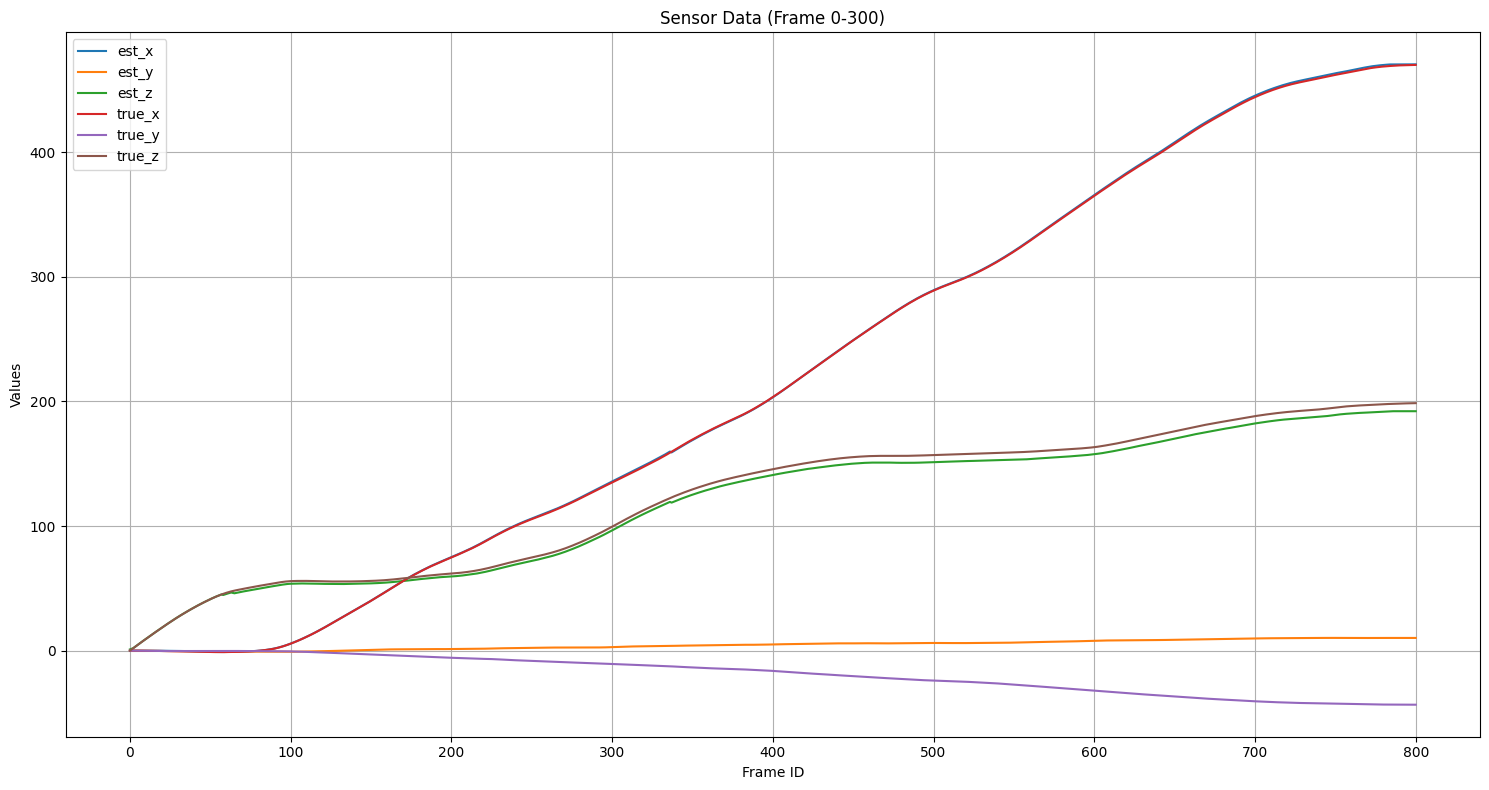

In [63]:

# Filter for frame_id 50 to 200
df_plot = df.loc[(df["frame_id"] >= 0) & (df["frame_id"] <= end), ["frame_id", "est_x", "est_y", "est_z", "true_x", "true_y", "true_z"]].copy()

# Show start and end frame
start_frame = df_plot["frame_id"].min()
end_frame = df_plot["frame_id"].max()
print(f"Start frame: {start_frame}, End frame: {end_frame}")

# Set frame_id as x-axis
x = df_plot["frame_id"]

# Select numeric columns (skip 'frame_id' and 'features_count')
plot_columns = df_plot.select_dtypes(include='number').columns.difference(["frame_id", "features_count"])

# Plot each column
plt.figure(figsize=(15, 8))
for col in plot_columns:
    plt.plot(x, df_plot[col], label=col)

plt.title("Sensor Data (Frame 0-300)")
plt.xlabel("Frame ID")
plt.ylabel("Values")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
